In [1]:
%matplotlib inline
import os
import os.path as op
import mne
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from mne.time_frequency import (tfr_multitaper, tfr_stockwell, tfr_morlet,
                                tfr_array_morlet)
from mne.stats import f_threshold_mway_rm, f_mway_rm, fdr_correction,bonferroni_correction
from mne.channels import find_ch_adjacency
from mne.stats import spatio_temporal_cluster_test, permutation_t_test
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns

In [2]:
list_subj = ['sub-001', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-008', 'sub-009',
             'sub-010', 'sub-012', 'sub-013', 'sub-014', 'sub-015', 'sub-016', 'sub-017']

In [3]:
evoked_hc = np.zeros((14,62,232))
evoked_lc = np.zeros((14,62,232))

In [4]:
hc = ['Stimulus/S 10',#high phase coherence , prioritized     [l]
 'Stimulus/S 11',#high phase coherence , prioritized     [r]
 'Stimulus/S 20',#high phase coherence , not prioritized [l]
 'Stimulus/S 21']#low phase coherence  , not prioritized [r]
lc = ['Stimulus/S 30',#low phase coherence  , prioritized     [l]
 'Stimulus/S 31',#low phase coherence  , prioritized     [r]
 'Stimulus/S 40',#low phase coherence  , not prioritized [l]
 'Stimulus/S 41']

In [5]:
for i,subj in enumerate(list_subj):
    fname =os.path.join("D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg2", subj + "_pred.fif")
    epochs = mne.read_epochs(fname)
    
    evoked_hc[i] = epochs[hc].average().data
    evoked_lc[i] = epochs[lc].average().data

Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg2\sub-001_pred.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...     800.78 ms
        0 CTF compensation matrices available


<ipython-input-5-c1badcb6fdbb>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg2\sub-001_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)


Not setting metadata
Not setting metadata
544 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg2\sub-003_pred.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
539 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


<ipython-input-5-c1badcb6fdbb>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg2\sub-003_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)
<ipython-input-5-c1badcb6fdbb>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg2\sub-004_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)


Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg2\sub-004_pred.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
384 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg2\sub-005_pred.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
316 matching events found
No baseline correction applied
Created an SSP operator (subspace dimensio

<ipython-input-5-c1badcb6fdbb>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg2\sub-005_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)
<ipython-input-5-c1badcb6fdbb>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg2\sub-006_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)


    Found the data of interest:
        t =    -101.56 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
395 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg2\sub-008_pred.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
449 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg2\sub-009_pred.fif ...
    Read a total of 1 projection items:


<ipython-input-5-c1badcb6fdbb>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg2\sub-008_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)
<ipython-input-5-c1badcb6fdbb>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg2\sub-009_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)


        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
262 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg2\sub-010_pred.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
107 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg2\sub-012_pred.fif ...
    

<ipython-input-5-c1badcb6fdbb>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg2\sub-010_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)
<ipython-input-5-c1badcb6fdbb>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg2\sub-012_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)


Not setting metadata
387 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg2\sub-013_pred.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
199 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg2\sub-014_pred.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...     800.78 ms
        0 CTF compensation matr

<ipython-input-5-c1badcb6fdbb>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg2\sub-013_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)
<ipython-input-5-c1badcb6fdbb>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg2\sub-014_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)


Not setting metadata
Not setting metadata
396 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg2\sub-015_pred.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
476 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg2\sub-016_pred.fif ...
    Read a total of 1 projection items:


<ipython-input-5-c1badcb6fdbb>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg2\sub-015_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)
<ipython-input-5-c1badcb6fdbb>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg2\sub-016_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)


        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
194 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg2\sub-017_pred.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
287 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


<ipython-input-5-c1badcb6fdbb>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg2\sub-017_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)


In [6]:
evoked_hc.shape

(14, 62, 232)

In [11]:
ch_name_CPz = 'CPz'
ch_name_CP1 = 'CP1'
ch_name_CP2 = 'CP2'

In [12]:
channel_indices_CPz = mne.pick_channels(epochs.info['ch_names'], [ch_name_CPz])[0]
channel_indices_CP1 = mne.pick_channels(epochs.info['ch_names'], [ch_name_CP1])[0]
channel_indices_CP2 = mne.pick_channels(epochs.info['ch_names'], [ch_name_CP1])[0]

In [13]:
times = epochs.times

In [14]:
CPP_amplitude_hc = np.array((evoked_hc[:,channel_indices_CPz,:],
                          evoked_hc[:,channel_indices_CP1,:],
                          evoked_hc[:,channel_indices_CP2,:])).mean(axis=0)
CPP_amplitude_lc = np.array((evoked_lc[:,channel_indices_CPz,:],
                          evoked_lc[:,channel_indices_CP1,:],
                          evoked_lc[:,channel_indices_CP2,:])).mean(axis=0)

In [15]:
CPP_amplitude_hc.shape

(14, 232)

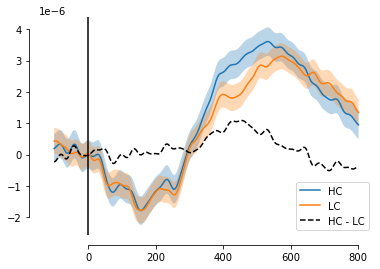

In [29]:

plt.figure()

plt.plot(times*1000, CPP_amplitude_hc.mean(axis=0),label='HC')

error = CPP_amplitude_hc.mean(axis=0).std(axis=0)/np.sqrt(14)
plt.fill_between(times*1000, 
                 CPP_amplitude_hc.mean(axis=0) -error,  
                 CPP_amplitude_hc.mean(axis=0) +error,
                 alpha=0.3)

plt.plot(times*1000, CPP_amplitude_lc.mean(axis=0),label='LC')

error = CPP_amplitude_lc.mean(axis=0).std(axis=0)/np.sqrt(14)
plt.fill_between(times*1000, 
                 CPP_amplitude_lc.mean(axis=0) -error,  
                 CPP_amplitude_lc.mean(axis=0) +error,
                 alpha=0.3)

plt.plot(times*1000, 
         CPP_amplitude_hc.mean(axis=0) - CPP_amplitude_lc.mean(axis=0),
         'k--', 
         label='HC - LC')
plt.legend()
plt.show
sns.despine(offset=10, trim=True)  # <-- only show the right spine

plt.axvline(x=0, color='black')

In [30]:
win_low = int((-59 + 100)/3.9)
win_up  = int((650 + 100)/3.9)

In [31]:
T, pval = stats.ttest_rel(CPP_amplitude_hc[:,win_low:win_up], 
                          CPP_amplitude_lc[:,win_low:win_up])
alpha = 0.05

In [32]:
3.9*np.arange(win_low,win_up)[pval<0.05]-100

array([-45.4, -41.5, -37.6, -33.7, 231.5, 235.4, 239.3, 348.5, 352.4,
       356.3, 360.2, 364.1, 368. , 371.9, 375.8, 379.7, 383.6, 387.5,
       391.4, 395.3, 399.2, 403.1, 407. , 410.9, 414.8, 418.7, 422.6,
       426.5, 430.4, 434.3, 438.2, 442.1, 446. , 449.9, 453.8, 457.7,
       461.6, 465.5, 469.4, 473.3, 477.2, 481.1, 485. , 488.9, 492.8,
       496.7, 500.6, 504.5, 508.4, 516.2, 520.1, 524. , 527.9, 531.8,
       535.7, 539.6, 543.5, 547.4])

In [33]:
time_min = int((100 + 340)/3.9)
time_max = int((100 + 550)/3.9)

In [34]:
times[time_min]*1000, times[time_max]*1000

(335.9375, 546.875)

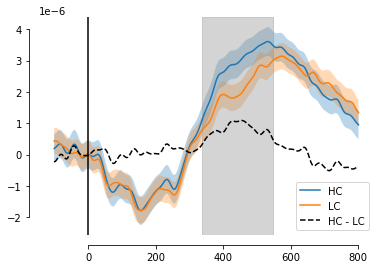

In [37]:

plt.figure()

plt.plot(times*1000, CPP_amplitude_hc.mean(axis=0),label='HC')

error = CPP_amplitude_hc.mean(axis=0).std(axis=0)/np.sqrt(14)
plt.fill_between(times*1000, 
                 CPP_amplitude_hc.mean(axis=0) -error,  
                 CPP_amplitude_hc.mean(axis=0) +error,
                 alpha=0.3)

plt.plot(times*1000, CPP_amplitude_lc.mean(axis=0),label='LC')

error = CPP_amplitude_lc.mean(axis=0).std(axis=0)/np.sqrt(14)
plt.fill_between(times*1000, 
                 CPP_amplitude_lc.mean(axis=0) -error,  
                 CPP_amplitude_lc.mean(axis=0) +error,
                 alpha=0.3)

plt.plot(times*1000, 
         CPP_amplitude_hc.mean(axis=0) - CPP_amplitude_lc.mean(axis=0),
         'k--', 
         label='HC - LC')
plt.axvspan(times[time_min]*1000, times[time_max]*1000, color=sns.xkcd_rgb['grey'], alpha=0.4, ymax= 1)
plt.legend()
plt.show
sns.despine(offset=10, trim=True)  # <-- only show the right spine

plt.axvline(x=0, color='black')

In [23]:
CPP_amplitude_hc_mean = CPP_amplitude_hc[:,time_min:time_max].mean(axis = 1)
CPP_amplitude_lc_mean = CPP_amplitude_lc[:,time_min:time_max].mean(axis = 1)

In [24]:
stats.ttest_rel(CPP_amplitude_hc_mean,CPP_amplitude_lc_mean)

Ttest_relResult(statistic=5.196284748064558, pvalue=0.00017220036649676294)

In [25]:
diff_CPP_amplitude = CPP_amplitude_hc_mean - CPP_amplitude_lc_mean

In [26]:
cpp = pd.DataFrame({'high':CPP_amplitude_hc_mean,
                    'low':CPP_amplitude_lc_mean,
                    'diff':diff_CPP_amplitude})

In [27]:
cpp.to_csv('D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/cpp2.csv',index=False)

Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg\sub-001_pred.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
513 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


<ipython-input-393-95e4fd6957d0>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg\sub-001_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)


combining channels using "gfp"
combining channels using "gfp"


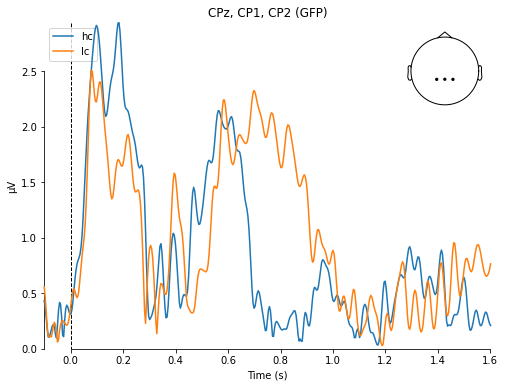

[<Figure size 576x432 with 2 Axes>]

In [393]:
subj='sub-001'
fname =os.path.join("D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg", subj + "_pred.fif")
epochs = mne.read_epochs(fname)
evoked_hc=epochs[hc].average()
evoked_lc=epochs[lc].average()
mne.viz.plot_compare_evokeds(dict(hc=evoked_hc, lc=evoked_lc),
                             picks=['CPz','CP1','CP2'],
                             legend='upper left', show_sensors='upper right')

In [394]:

evoked_hc = epochs[hc].get_data()
evoked_lc = epochs[lc].get_data()
ch_name_CPz = 'CPz'
ch_name_CP1 = 'CP1'
ch_name_CP2 = 'CP2'
channel_indices_CPz = mne.pick_channels(epochs.info['ch_names'], [ch_name_CPz])[0]
channel_indices_CP1 = mne.pick_channels(epochs.info['ch_names'], [ch_name_CP1])[0]
channel_indices_CP2 = mne.pick_channels(epochs.info['ch_names'], [ch_name_CP1])[0]
CPP_amplitude_hc = np.array((evoked_hc[channel_indices_CPz,:],
                          evoked_hc[channel_indices_CP1,:],
                          evoked_hc[channel_indices_CP2,:])).mean(axis=0)
CPP_amplitude_lc = np.array((evoked_lc[channel_indices_CPz,:],
                          evoked_lc[channel_indices_CP1,:],
                          evoked_lc[channel_indices_CP2,:])).mean(axis=0)
win_low = int((-59 + 100)/3.9)
win_up  = int((650 + 100)/3.9)
T, pval = stats.ttest_rel(CPP_amplitude_hc[win_low:win_up], 
                          CPP_amplitude_lc[win_low:win_up])
alpha = 0.05
reject_fdr, pval_fdr = fdr_correction(pval, alpha=alpha, method='indep')
3.9*np.arange(win_low,win_up)[pval_fdr<0.05]-100

IndexError: boolean index did not match indexed array along dimension 0; dimension is 182 but corresponding boolean dimension is 437

Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg\sub-003_pred.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
512 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


<ipython-input-395-ddf66be79d61>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg\sub-003_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)


combining channels using "gfp"
combining channels using "gfp"


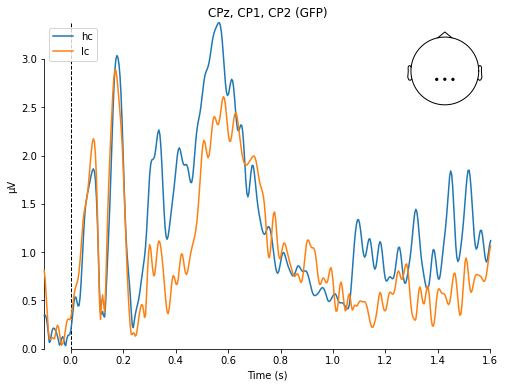

[<Figure size 576x432 with 2 Axes>]

In [395]:
subj='sub-003'
fname =os.path.join("D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg", subj + "_pred.fif")
epochs = mne.read_epochs(fname)
evoked_hc=epochs[hc].average()
evoked_lc=epochs[lc].average()
mne.viz.plot_compare_evokeds(dict(hc=evoked_hc, lc=evoked_lc),
                             picks=['CPz','CP1','CP2'],
                             legend='upper left', show_sensors='upper right')

Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg\sub-004_pred.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
292 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
combining channels using "gfp"


<ipython-input-330-65259a8de119>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg\sub-004_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)


combining channels using "gfp"


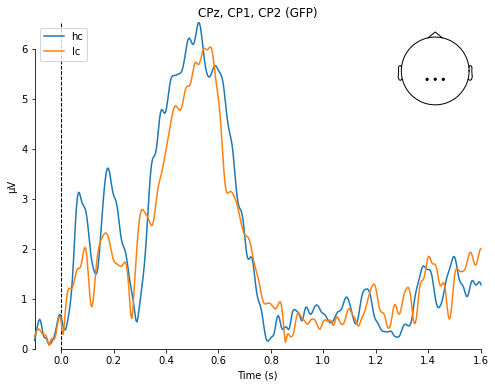

[<Figure size 576x432 with 2 Axes>]

In [330]:
subj='sub-004'
fname =os.path.join("D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg", subj + "_pred.fif")
epochs = mne.read_epochs(fname)
evoked_hc=epochs[hc].average()
evoked_lc=epochs[lc].average()
mne.viz.plot_compare_evokeds(dict(hc=evoked_hc, lc=evoked_lc),
                             picks=['CPz','CP1','CP2'],
                             legend='upper left', show_sensors='upper right')

Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg\sub-005_pred.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
158 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
combining channels using "gfp"
combining channels using "gfp"


<ipython-input-331-49a9833674f8>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg\sub-005_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)


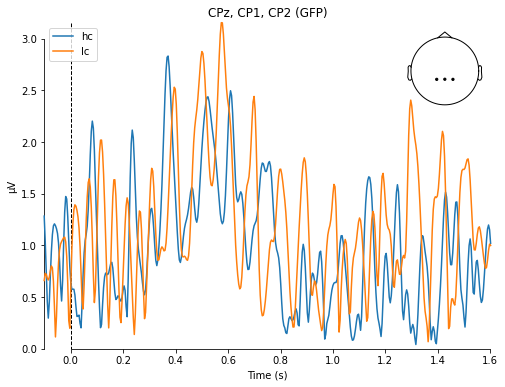

[<Figure size 576x432 with 2 Axes>]

In [331]:
subj='sub-005'
fname =os.path.join("D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg", subj + "_pred.fif")
epochs = mne.read_epochs(fname)
evoked_hc=epochs[hc].average()
evoked_lc=epochs[lc].average()
mne.viz.plot_compare_evokeds(dict(hc=evoked_hc, lc=evoked_lc),
                             picks=['CPz','CP1','CP2'],
                             legend='upper left', show_sensors='upper right')

Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg\sub-006_pred.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
116 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
combining channels using "gfp"
combining channels using "gfp"


<ipython-input-127-33fc298d70d9>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg\sub-006_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)


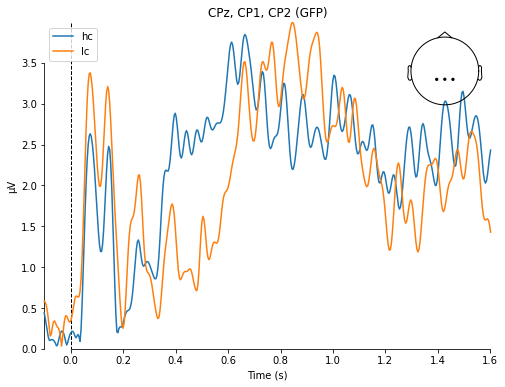

[<Figure size 576x432 with 2 Axes>]

In [127]:
subj='sub-006'
fname =os.path.join("D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg", subj + "_pred.fif")
epochs = mne.read_epochs(fname)
evoked_hc=epochs[hc].average()
evoked_lc=epochs[lc].average()
mne.viz.plot_compare_evokeds(dict(hc=evoked_hc, lc=evoked_lc),
                             picks=['CPz','CP1','CP2'],
                             legend='upper left', show_sensors='upper right')

Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg\sub-008_pred.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
182 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
combining channels using "gfp"
combining channels using "gfp"


<ipython-input-128-4a14a8bfdfd4>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg\sub-008_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)


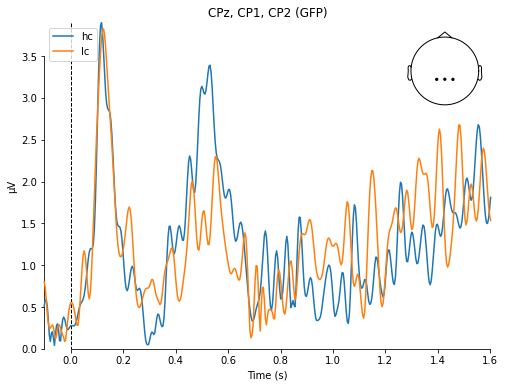

[<Figure size 576x432 with 2 Axes>]

In [128]:
subj='sub-008'
fname =os.path.join("D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg", subj + "_pred.fif")
epochs = mne.read_epochs(fname)
evoked_hc=epochs[hc].average()
evoked_lc=epochs[lc].average()
mne.viz.plot_compare_evokeds(dict(hc=evoked_hc, lc=evoked_lc),
                             picks=['CPz','CP1','CP2'],
                             legend='upper left', show_sensors='upper right')

Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg\sub-009_pred.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
48 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
combining channels using "gfp"
combining channels using "gfp"


<ipython-input-129-a82cf805106b>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg\sub-009_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)


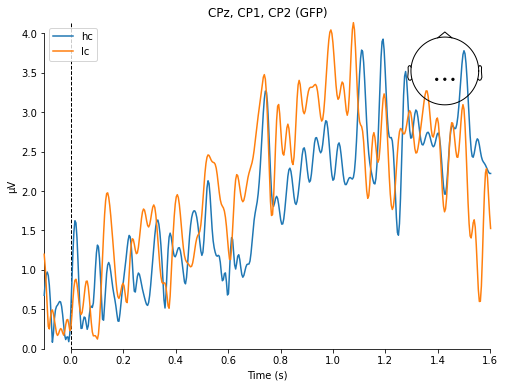

[<Figure size 576x432 with 2 Axes>]

In [129]:
subj='sub-009'
fname =os.path.join("D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg", subj + "_pred.fif")
epochs = mne.read_epochs(fname)
evoked_hc=epochs[hc].average()
evoked_lc=epochs[lc].average()
mne.viz.plot_compare_evokeds(dict(hc=evoked_hc, lc=evoked_lc),
                             picks=['CPz','CP1','CP2'],
                             legend='upper left', show_sensors='upper right')

Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg\sub-010_pred.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
28 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
combining channels using "gfp"
combining channels using "gfp"


<ipython-input-130-f5346edacdc0>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg\sub-010_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)


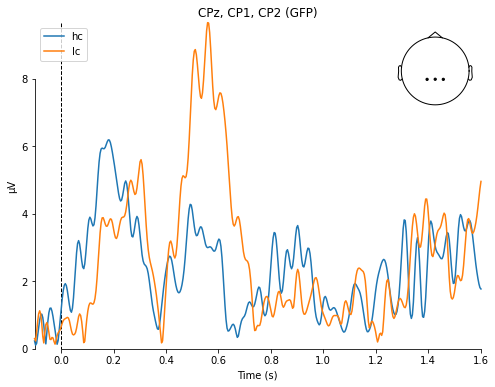

[<Figure size 576x432 with 2 Axes>]

In [130]:
subj='sub-010'
fname =os.path.join("D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg", subj + "_pred.fif")
epochs = mne.read_epochs(fname)
evoked_hc=epochs[hc].average()
evoked_lc=epochs[lc].average()
mne.viz.plot_compare_evokeds(dict(hc=evoked_hc, lc=evoked_lc),
                             picks=['CPz','CP1','CP2'],
                             legend='upper left', show_sensors='upper right')

Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg\sub-012_pred.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
149 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
combining channels using "gfp"
combining channels using "gfp"


<ipython-input-131-023de2f7f916>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg\sub-012_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)


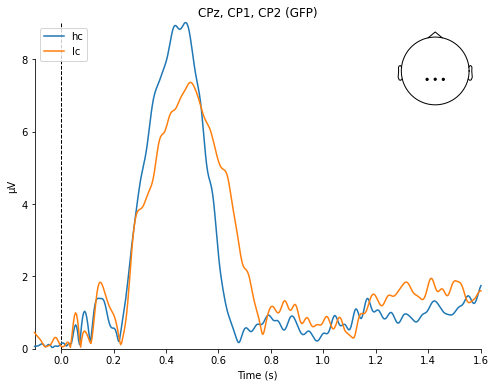

[<Figure size 576x432 with 2 Axes>]

In [131]:
subj='sub-012'
fname =os.path.join("D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg", subj + "_pred.fif")
epochs = mne.read_epochs(fname)
evoked_hc=epochs[hc].average()
evoked_lc=epochs[lc].average()
mne.viz.plot_compare_evokeds(dict(hc=evoked_hc, lc=evoked_lc),
                             picks=['CPz','CP1','CP2'],
                             legend='upper left', show_sensors='upper right')

Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg\sub-013_pred.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
52 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
combining channels using "gfp"
combining channels using "gfp"


<ipython-input-132-ff612efa9bce>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg\sub-013_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)


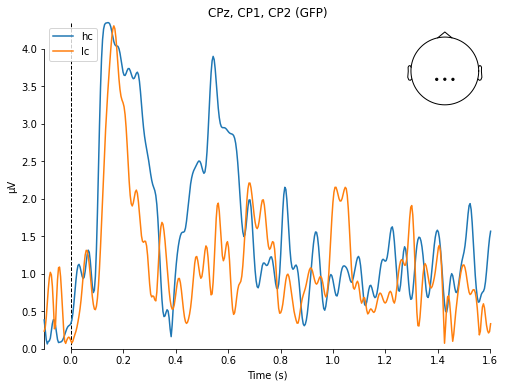

[<Figure size 576x432 with 2 Axes>]

In [132]:
subj='sub-013'
fname =os.path.join("D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg", subj + "_pred.fif")
epochs = mne.read_epochs(fname)
evoked_hc=epochs[hc].average()
evoked_lc=epochs[lc].average()
mne.viz.plot_compare_evokeds(dict(hc=evoked_hc, lc=evoked_lc),
                             picks=['CPz','CP1','CP2'],
                             legend='upper left', show_sensors='upper right')

Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg\sub-014_pred.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
127 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
combining channels using "gfp"
combining channels using "gfp"


<ipython-input-133-d41ab725e2cd>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg\sub-014_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)


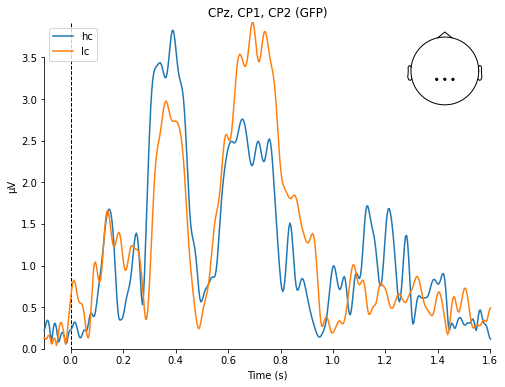

[<Figure size 576x432 with 2 Axes>]

In [133]:
subj='sub-014'
fname =os.path.join("D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg", subj + "_pred.fif")
epochs = mne.read_epochs(fname)
evoked_hc=epochs[hc].average()
evoked_lc=epochs[lc].average()
mne.viz.plot_compare_evokeds(dict(hc=evoked_hc, lc=evoked_lc),
                             picks=['CPz','CP1','CP2'],
                             legend='upper left', show_sensors='upper right')

Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg\sub-015_pred.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
182 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
combining channels using "gfp"
combining channels using "gfp"


<ipython-input-134-1a3c5443bd38>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg\sub-015_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)


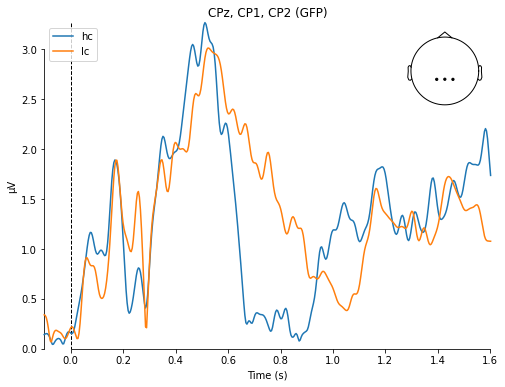

[<Figure size 576x432 with 2 Axes>]

In [134]:
subj='sub-015'
fname =os.path.join("D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg", subj + "_pred.fif")
epochs = mne.read_epochs(fname)
evoked_hc=epochs[hc].average()
evoked_lc=epochs[lc].average()
mne.viz.plot_compare_evokeds(dict(hc=evoked_hc, lc=evoked_lc),
                             picks=['CPz','CP1','CP2'],
                             legend='upper left', show_sensors='upper right')

Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg\sub-016_pred.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
combining channels using "gfp"
combining channels using "gfp"


<ipython-input-135-a573639ba7f3>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg\sub-016_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)


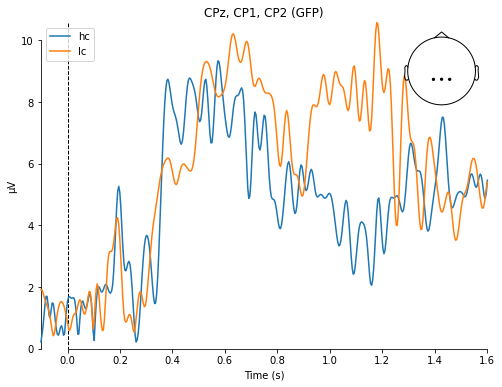

[<Figure size 576x432 with 2 Axes>]

In [135]:
subj='sub-016'
fname =os.path.join("D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg", subj + "_pred.fif")
epochs = mne.read_epochs(fname)
evoked_hc=epochs[hc].average()
evoked_lc=epochs[lc].average()
mne.viz.plot_compare_evokeds(dict(hc=evoked_hc, lc=evoked_lc),
                             picks=['CPz','CP1','CP2'],
                             legend='upper left', show_sensors='upper right')

Reading D:\yikang1020\yikangsystem1020\2_Projects\复杂知觉决策的证据积累模型：EEG和行为的证据\2_Study\2_4_Analysis\2_4_3_tmp_data\eeg\sub-017_pred.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =    -101.56 ...    1601.56 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
84 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
combining channels using "gfp"
combining channels using "gfp"


<ipython-input-136-3861c3df4c50>:3: RuntimeWarning: This filename (D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg\sub-017_pred.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname)


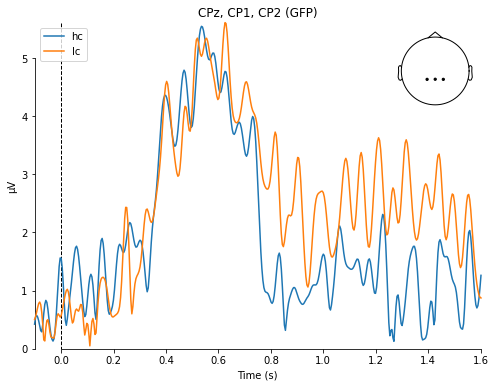

[<Figure size 576x432 with 2 Axes>]

In [136]:
subj='sub-017'
fname =os.path.join("D:/yikang1020/yikangsystem1020/2_Projects/复杂知觉决策的证据积累模型：EEG和行为的证据/2_Study/2_4_Analysis/2_4_3_tmp_data/eeg", subj + "_pred.fif")
epochs = mne.read_epochs(fname)
evoked_hc=epochs[hc].average()
evoked_lc=epochs[lc].average()
mne.viz.plot_compare_evokeds(dict(hc=evoked_hc, lc=evoked_lc),
                             picks=['CPz','CP1','CP2'],
                             legend='upper left', 
                             show_sensors='upper right')